In [22]:
import numpy as np
import pandas as pd

import sklearn.preprocessing as sp
import sklearn.datasets as sd
import sklearn.linear_model as lm
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.pipeline as pl

import matplotlib.pyplot as plt
import cv2 as cv
import pickle

In [23]:
boston = sd.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [24]:
boston.data.shape
boston.data[0] #ndarray类型，按行、列顺序访问

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [25]:
boston.target[0]

24.0

In [26]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data["TARGET"] = boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [27]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
data.pivot_table(index="CHAS",values="TARGET")

,TARGET
CHAS,
0.0,22.093843
1.0,28.440000


<AxesSubplot:xlabel='PTRATIO', ylabel='TARGET'>

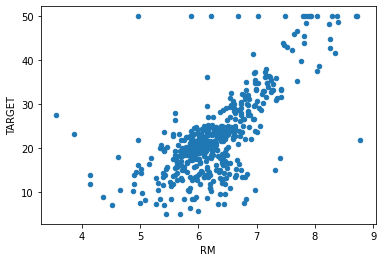

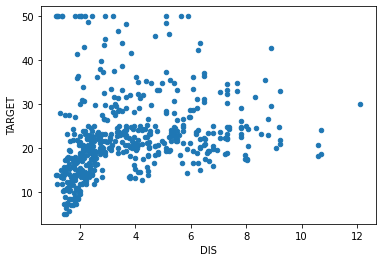

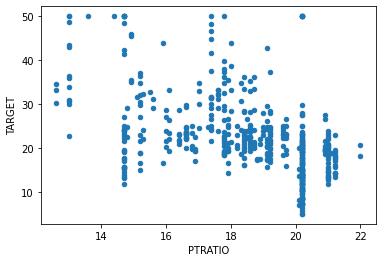

In [29]:
#如果想用这组数据训练线性模型，则需要先验证特征与输出之间的关系是否为线性关系


data.plot.scatter(x="RM",y="TARGET")

data.plot.scatter(x="DIS",y="TARGET")

data.plot.scatter(x="PTRATIO",y="TARGET")




In [30]:
#整理输入集与输出集，拆分训练集与测试集
#训练模型
#针对测试集预测，评估

x,y = data.iloc[:,:-1], data["TARGET"]

train_x,test_x,train_y,test_y = \
    ms.train_test_split(x,y,test_size=0.25,random_state=7)
#random_state: 随机种子 对同一组数据使用相同的随机种子划分数据集，得到的结果是一样的
train_x.shape,train_y.shape,

((379, 13), (379,))

In [31]:
model1 = lm.LinearRegression()
model1.fit(train_x,train_y)

#针对测试样本进行测试，评估
pred_test_y=model1.predict(test_x)

print(sm.r2_score(test_y,pred_test_y))

0.6170003090082059


[226] 0.686174510477483


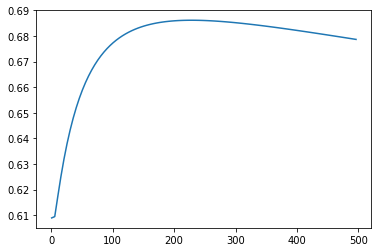

In [32]:
params=np.arange(1,500,5)
r2=[]


for p in params:

    model2 = lm.Ridge(p)
    model2.fit(train_x,train_y)

    #针对测试样本进行测试，评估
    pred_test_y=model2.predict(test_x)
    r2.append(sm.r2_score(test_y,pred_test_y))
    
#     print(sm.r2_score(test_y,pred_test_y))


plt.plot(params,r2)

r2_best=np.max(r2)
param_best=params[np.where(r2==r2_best)]
print(param_best,r2_best)


In [33]:
model3 = pl.make_pipeline(sp.PolynomialFeatures(2),lm.LinearRegression())
model3.fit(train_x,train_y)

#针对测试样本进行测试，评估
pred_test_y=model3.predict(test_x)

print(sm.r2_score(test_y,pred_test_y))

-0.9600793003355881


[39000] 0.7894553364909321


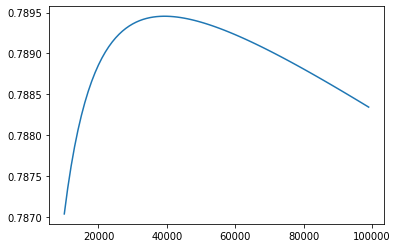

In [34]:
params=np.arange(10000,100000,1000)
r2=[]

for p in params:
    model4 = pl.make_pipeline(sp.PolynomialFeatures(2),lm.Ridge(p))
    model4.fit(train_x,train_y)

    #针对测试样本进行测试，评估
    pred_test_y=model4.predict(test_x)
    r2.append(sm.r2_score(test_y,pred_test_y))
#     print(sm.r2_score(test_y,pred_test_y))


plt.plot(params,r2)

r2_best=np.max(r2)
param_best=params[np.where(r2==r2_best)]
print(param_best,r2_best)




# 决策树回归模型

In [35]:
import sklearn.tree as st

0.6818314763623028


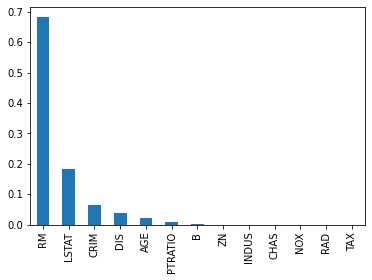

In [36]:
model_tree = st.DecisionTreeRegressor(max_depth=4)
model_tree.fit(train_x,train_y)
#获取特征重要性

fi=model_tree.feature_importances_
s=pd.Series(fi,index=train_x.columns)
s.sort_values(ascending=False).plot.bar()

pred_test_y=model_tree.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))

# AdaBoost（正向激励）集合模型（多颗决策树）

0.8103697531272509


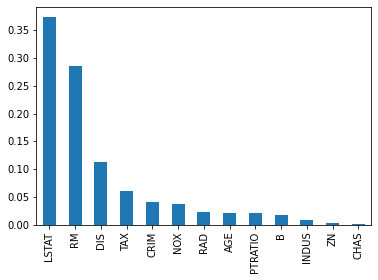

In [37]:
import sklearn.ensemble as se
model_Ada_Boost=se.AdaBoostRegressor(model_tree,n_estimators=400,random_state=7)


model_Ada_Boost.fit(train_x,train_y)
pred_test_y=model_Ada_Boost.predict(test_x)

fi=model_Ada_Boost.feature_importances_
s=pd.Series(fi,index=train_x.columns)
s.sort_values(ascending=False).plot.bar()


print(sm.r2_score(test_y,pred_test_y))

# GBDT回归模型

0.8560573785476906


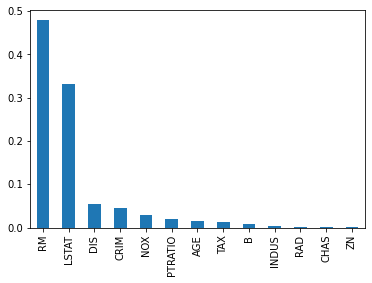

In [38]:
model_GBDT=se.GradientBoostingRegressor(max_depth=4,n_estimators=50,random_state=7,min_samples_split=5)
#max_depth 每棵树的深度
# n_estimators 弱模型的数量
# min_samples_split 样本最小拆分数，若叶子结点样本数量小于该值，则不再向下拆分

model_GBDT.fit(train_x,train_y)
pred_test_y=model_GBDT.predict(test_x)

fi=model_GBDT.feature_importances_
s=pd.Series(fi,index=train_x.columns)
s.sort_values(ascending=False).plot.bar()


print(sm.r2_score(test_y,pred_test_y))


In [43]:
param_a=[2,3,4,5,6,7,8,9]
param_b=[3,5,7,9]


for a in param_a:
    for b in param_b:
        model_GBDT=se.GradientBoostingRegressor(max_depth=a,n_estimators=50,random_state=7,min_samples_split=b)
        model_GBDT.fit(train_x,train_y)
        pred_test_y=model_GBDT.predict(test_x)
        
        print(a,b,"->",sm.r2_score(test_y,pred_test_y))
        
        

2 3 -> 0.8245358081596224
2 5 -> 0.8245358081596224
2 7 -> 0.8245358081596224
2 9 -> 0.8245358081596224
3 3 -> 0.8630660691254738
3 5 -> 0.8667775058468955
3 7 -> 0.858438638015177
3 9 -> 0.8565310802289338
4 3 -> 0.850887038500068
4 5 -> 0.8560573785476906
4 7 -> 0.8533630103460881
4 9 -> 0.8504283425470978
5 3 -> 0.8472440829595789
5 5 -> 0.8564276136513065
5 7 -> 0.8543033665371031
5 9 -> 0.8554848827311488
6 3 -> 0.8368792489147857
6 5 -> 0.8289709027527081
6 7 -> 0.8423221114068006
6 9 -> 0.8476513514523203
7 3 -> 0.8072204550346301
7 5 -> 0.8224803865599694
7 7 -> 0.8431262994450035
7 9 -> 0.837885318475996
8 3 -> 0.7932919356752879
8 5 -> 0.8061255204258806
8 7 -> 0.83557543235936
8 9 -> 0.8330307250083633
9 3 -> 0.7732711884286533
9 5 -> 0.7935157136515604
9 7 -> 0.8258280763037397
9 9 -> 0.8238495458705559


# 随机森林模型

0.8208260563039097


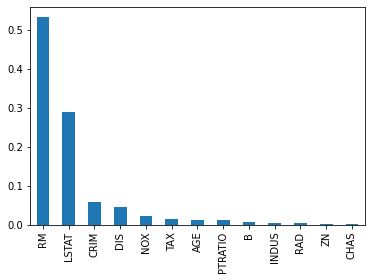

In [42]:
model_RF=se.RandomForestRegressor(max_depth=8,n_estimators=400,min_samples_split=5)
model_RF.fit(train_x,train_y)
pred_test_y=model_RF.predict(test_x)


fi=model_RF.feature_importances_
s=pd.Series(fi,index=train_x.columns)
s.sort_values(ascending=False).plot.bar()

print(sm.r2_score(test_y,pred_test_y))
